## 2e. Evidence - Explainability QAS Measurements.

Now we proceed to gather data about the Interpretability of the model, for the corresponding scenario.

In [ ]:
{
    "tags": [],
    "quality_attribute": "",
    "description": "",
    "inputs": "",
    "output": ""
}

### Initialize MLTE Context

MLTE contains a global context that manages the currently active _session_. Initializing the context tells MLTE how to store all of the artifacts that it produces. This import will also set up global constants related to folders and model to use.

In [1]:
# Sets up context for the model being used, sets up constants related to folders and model data to be used.
from session import *

Creating initial custom lists at URI: local:///Users/rbrowersinning/Documents/ResearchFolders/Continuum_LTP/GitRepos/mlte_llm/demo/GardenBuddy/../store
Loaded 7 qa_categories for initial list
Loaded 30 quality_attributes for initial list
Creating sample catalog at URI: StoreType.LOCAL_FILESYSTEM:local:///Users/rbrowersinning/Documents/ResearchFolders/Continuum_LTP/GitRepos/mlte_llm/demo/GardenBuddy/../store
Loading sample catalog entries.
Loaded 9 entries for sample catalog.


### Set up scenario test case

In [2]:
from mlte.negotiation.artifact import NegotiationCard

card = NegotiationCard.load()
qa = 4
print(card.quality_scenarios[qa].identifier)
print(card.quality_scenarios[qa].quality)
print(
    card.quality_scenarios[qa].stimulus,
    "from ",
    card.quality_scenarios[qa].source,
    " during ",
    card.quality_scenarios[qa].environment,
    ". ",
    card.quality_scenarios[qa].response,
    card.quality_scenarios[qa].measure,
)

card.default-qas_005
Understandability
The model receives a picture taken at the garden from  the Garden Buddy application  during  normal operations .  The application indicates main features that were used to recognize the flower, as part of the educational experience.  The app displays the original image highlighting the most informative features in flower identification, in addition to the flower name


**A Specific test case generated from the scenario:**

**Data and Data Source:**	The original test data set can be used.

**Measurement and Condition:**	The model needs to return evidence, in this case a heat map implementing the Integrated Gradients algorithm, showing the pixels that were most informative in the classification decision. This evidence should be returned with each inference. 

**Context:**	Normal Operation

### Helper Functions

Functions to help, and data setup.

In [3]:
from utils.model_analysis import *

# Load the model/
loaded_model = load_model(MODEL_FILE_PATH)

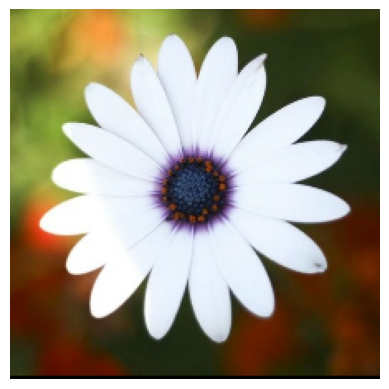

In [4]:
# Load and show the image.

flower_img = "flower3.jpg"  # Filename of flower image to use, public domain image adapted from: https://commons.wikimedia.org/wiki/File:Beautiful_white_flower_in_garden.jpg
flower_idx = (
    42  # Classifier index of associated flower (see OxfordFlower102Labels.csv)
)

im = read_image(os.path.join(SAMPLE_DATASET_DIR, flower_img))

plt.imshow(im)
plt.axis("off")
plt.show()

In [5]:
predictions = run_model(im, loaded_model)

baseline, alphas = generate_baseline_and_alphas()

In [6]:
interpolated_images = interpolate_images(
    baseline=baseline, image=im, alphas=alphas
)

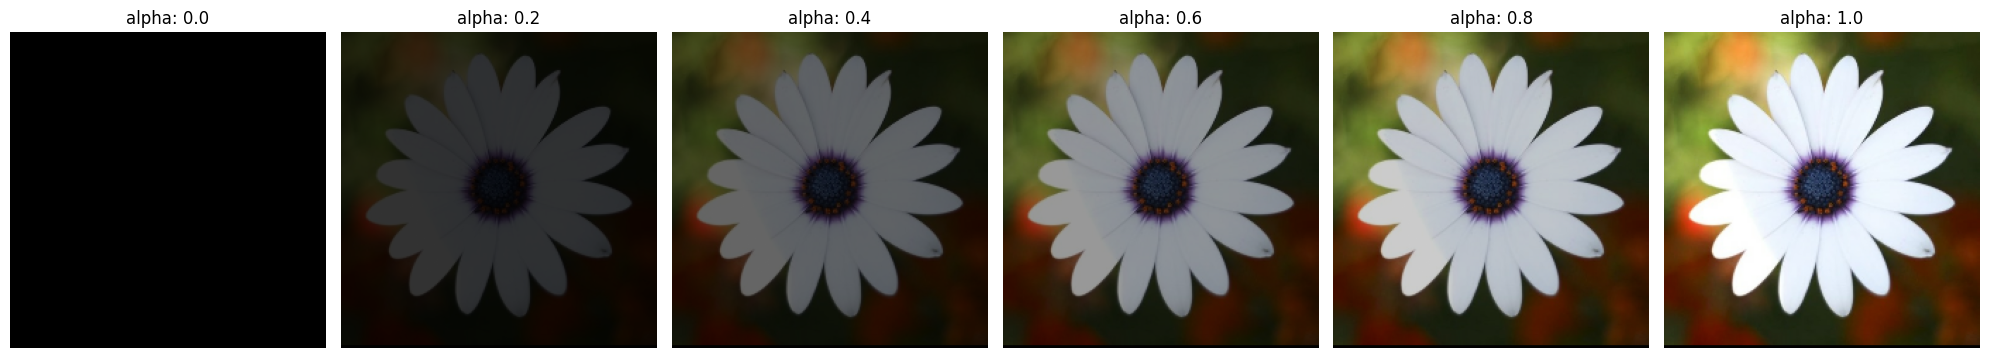

In [7]:
fig = plt.figure(figsize=(20, 20))

i = 0
for alpha, image in zip(alphas[0::10], interpolated_images[0::10]):
    i += 1
    plt.subplot(1, len(alphas[0::10]), i)
    plt.title(f"alpha: {alpha:.1f}")
    plt.imshow(image)
    plt.axis("off")

plt.tight_layout()

In [8]:
path_gradients = compute_gradients(
    loaded_model=loaded_model,
    images=interpolated_images,
    target_class_idx=flower_idx,
)
print(path_gradients.shape)

ig = integral_approximation(gradients=path_gradients)
print(ig.shape)

(51, 224, 224, 3)
(224, 224, 3)


In [9]:
ig_attributions = integrated_gradients(
    baseline=baseline,
    image=im,
    target_class_idx=flower_idx,
    loaded_model=loaded_model,
    m_steps=240,
)
print(ig_attributions.shape)

(224, 224, 3)


### Measurements

Execute and store measurements.

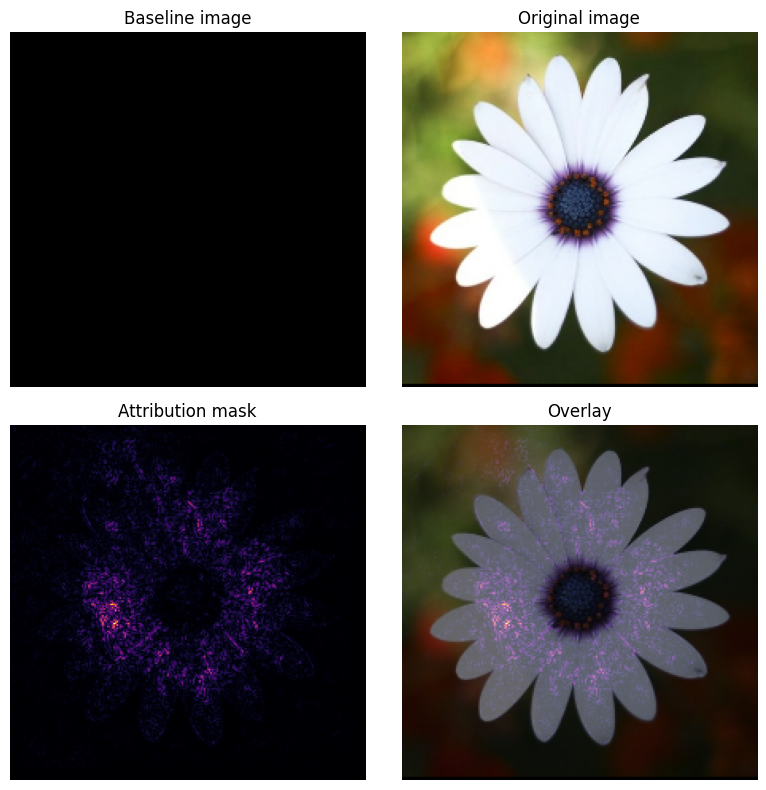

In [10]:
fig = plot_img_attributions(
    image=im,
    baseline=baseline,
    target_class_idx=flower_idx,
    loaded_model=loaded_model,
    m_steps=240,
    cmap=plt.cm.inferno,
    overlay_alpha=0.4,
)

plt.savefig(MEDIA_DIR / "attributions.png")

In [11]:
from mlte.measurement.external_measurement import ExternalMeasurement
from mlte.evidence.types.image import Image

# Save to MLTE store.
img_collector = ExternalMeasurement("image attributions", Image)
img = img_collector.evaluate(MEDIA_DIR / "attributions.png")
img.save(force=True)

ArtifactModel(header=ArtifactHeaderModel(identifier='evidence.image attributions', type='evidence', timestamp=1762181821, creator=None, level='version'), body=EvidenceModel(artifact_type=<ArtifactType.EVIDENCE: 'evidence'>, metadata=EvidenceMetadata(test_case_id='image attributions', measurement=MeasurementMetadata(measurement_class='mlte.measurement.external_measurement.ExternalMeasurement', output_class='mlte.evidence.types.image.Image', additional_data={})), evidence_class='mlte.evidence.types.image.Image', value=ImageValueModel(evidence_type=<EvidenceType.IMAGE: 'image'>, data='iVBORw0KGgoAAAANSUhEUgAAAyAAAAMgCAYAAADbcAZoAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90\nbGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9h\nAAAPYQGoP6dpAAEAAElEQVR4nOz9B5QkWVYejt8wacpXte+eHm/Xs4ZlYYHFSAIhBEggA5L+gCTM\nkYQEQg45JKQjgwzSkbcgkJD30k9CuNV6wTrWzM7uju3x077LZ2ZE/M+1777IyOrqnpmqWfbdmerK\nyoyMePHiZcb97v2+e7OmaRpIlixZsmTJkiVLlixZsgOw/CAOkixZsmTJkiVLlixZsmRoCYAkS5Ys\nWbJkyZIlS5bswCwBkGTJk